In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn import metrics

In [3]:
# Load the new dataset with the engineered features
file_path = 'Dataset2.xlsx'  # Update with your file path
data = pd.read_excel(file_path)

In [4]:
# Create a column called Inverse interatomic distance
data['Inverse interatomic distance'] = 1 / data['Interatomic distance']

In [5]:
# Create a column called Lennard_Jones interatomic distance
# Lennard-Jones potential parameters
epsilon = 1
sigma = 1

In [6]:
# Calculate Lennard-Jones potential
data['Lennard_Jones interatomic distance'] = 4 * epsilon * (
    (sigma * data['Inverse interatomic distance']) ** 12 - 
    (sigma * data['Inverse interatomic distance']) ** 6
)

In [7]:
data.head()

,Index,Interaction,Interatomic distance,Atomic charge A (MK),Atomic charge B (MK),LPED,Inverse interatomic distance,Lennard_Jones interatomic distance
0,1,Cl-Ar (HCl-Ar),3.976,-0.212,0.001,-0.18,0.251509,-0.001012
1,2,Cl-H(Chloromethane dimer) (avg),3.121,-0.165,0.154,-0.88,0.320410,-0.004323
2,3,F-F (tetrafluoromethane dimer) (avg),3.063,-0.210,-0.184,-0.53,0.326477,-0.004838
3,4,O-H(methyl ether dimer) (avg),2.771,-0.295,0.087,-1.17,0.360881,-0.008816
4,5,O-O (methyl ether dimer),3.220,-0.295,-0.271,-1.42,0.310559,-0.003585


In [8]:
# Drop the index column, categorical variable, and the original interatomic distance column
data_cleaned = data.drop(columns=['Index', 'Interaction', 'Interatomic distance', 'Inverse interatomic distance'])

data_cleaned.head()

,Atomic charge A (MK),Atomic charge B (MK),LPED,Lennard_Jones interatomic distance
0,-0.212,0.001,-0.18,-0.001012
1,-0.165,0.154,-0.88,-0.004323
2,-0.210,-0.184,-0.53,-0.004838
3,-0.295,0.087,-1.17,-0.008816
4,-0.295,-0.271,-1.42,-0.003585


In [9]:
# Store the 'LPED' column separately
lped_column = data_cleaned['LPED']

# Drop 'LPED' column temporarily
data_cleaned = data_cleaned.drop(columns=['LPED'])

# Reassign 'LPED' as the last column
data_cleaned['LPED'] = lped_column

data_cleaned

,Atomic charge A (MK),Atomic charge B (MK),Lennard_Jones interatomic distance,LPED
0,-0.212,0.001,-0.001012,-0.18
1,-0.165,0.154,-0.004323,-0.88
2,-0.210,-0.184,-0.004838,-0.53
3,-0.295,0.087,-0.008816,-1.17
4,-0.295,-0.271,-0.003585,-1.42
5,-0.439,0.004,-0.003072,-0.80
6,-0.824,0.410,-0.037020,-2.48
7,0.083,0.082,-0.011888,-0.46
8,-0.166,-0.083,-0.002070,-2.07
9,-0.471,0.461,-0.147036,-10.93


In [10]:
data_cleaned.describe()

,Atomic charge A (MK),Atomic charge B (MK),Lennard_Jones interatomic distance,LPED
count,24.000000,24.000000,24.000000,24.000000
mean,-0.386333,0.382958,-0.045557,-4.601667
std,0.437302,0.485169,0.052855,4.143713
min,-0.957000,-0.271000,-0.199117,-13.180000
25%,-0.729000,0.085750,-0.078314,-8.087500
50%,-0.420500,0.325500,-0.025424,-2.820000
75%,-0.211500,0.466750,-0.006774,-1.357500
max,0.870000,1.497000,-0.001012,-0.180000


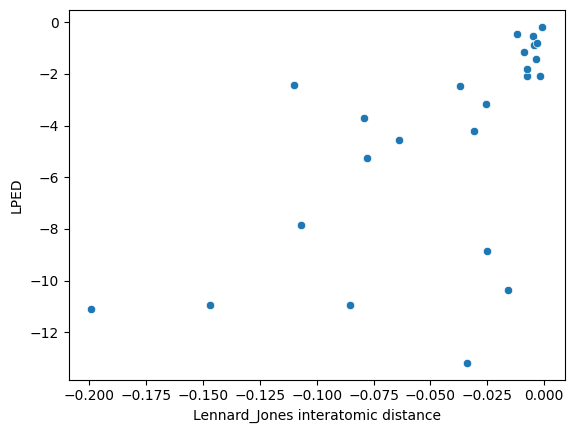

In [11]:
sns.scatterplot(x='Lennard_Jones interatomic distance', y='LPED', data=data)
plt.show()

<Axes: xlabel='Atomic charge A (MK)', ylabel='LPED'>

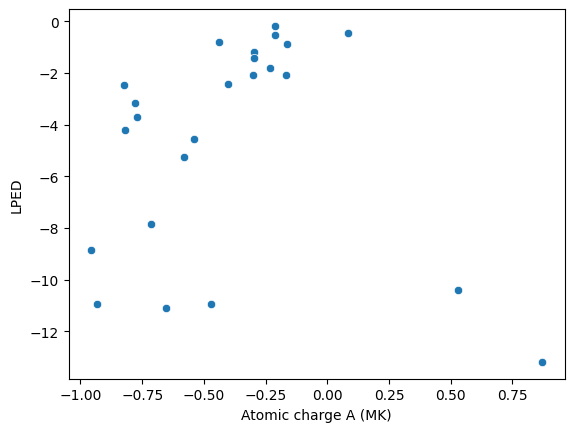

In [12]:
sns.scatterplot(x='Atomic charge A (MK)', y='LPED', data=data)

<Axes: xlabel='Atomic charge B (MK)', ylabel='LPED'>

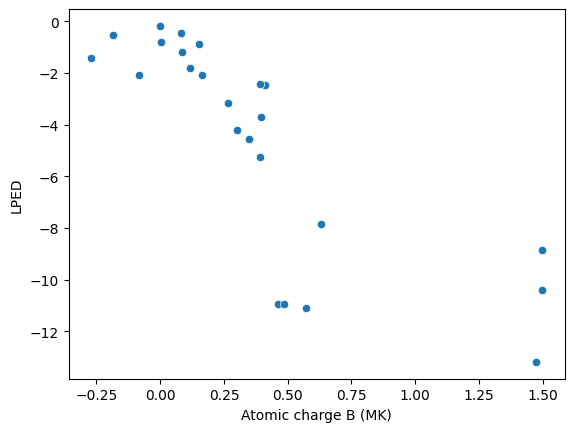

In [13]:
sns.scatterplot(x='Atomic charge B (MK)', y='LPED', data=data)

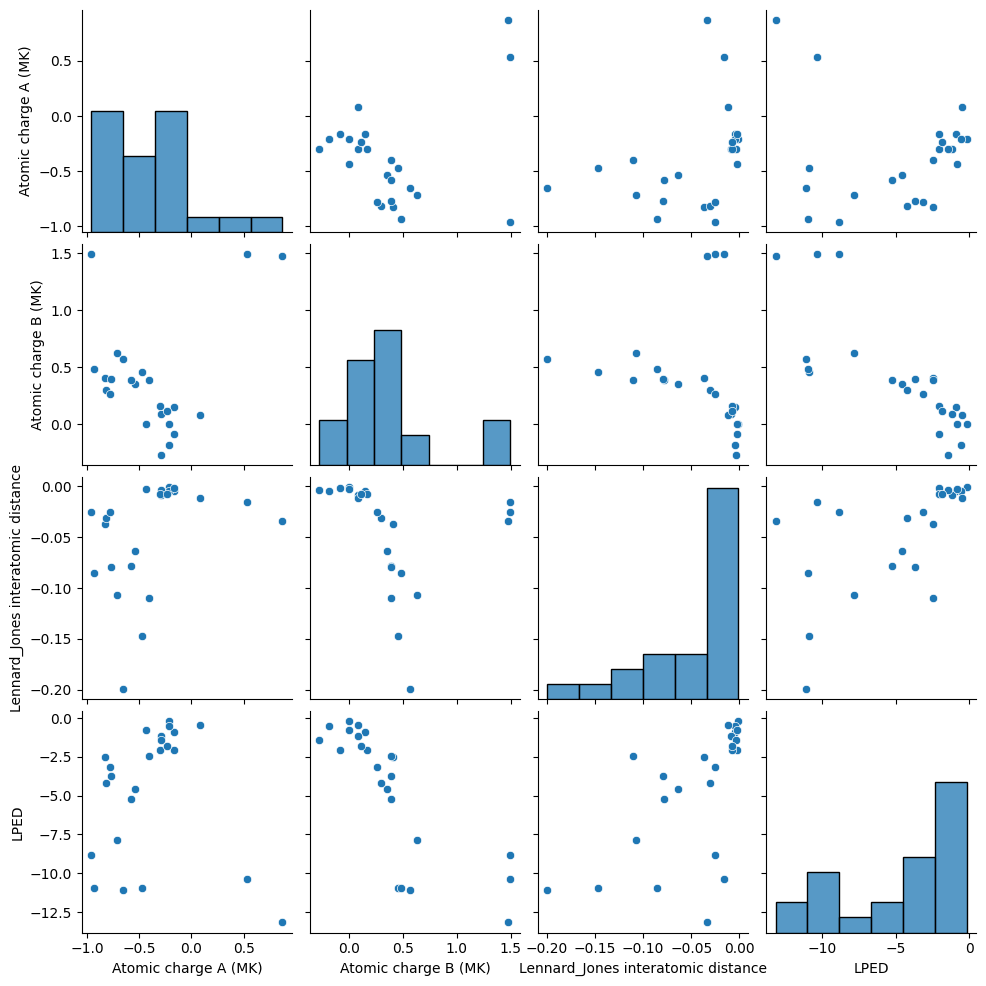

In [14]:
sns.pairplot(data_cleaned)
plt.show()

In [15]:
dfc = data_cleaned.corr()
dfc

,Atomic charge A (MK),Atomic charge B (MK),Lennard_Jones interatomic distance,LPED
Atomic charge A (MK),1.000000,0.214487,0.357826,-0.069886
Atomic charge B (MK),0.214487,1.000000,-0.244972,-0.798577
Lennard_Jones interatomic distance,0.357826,-0.244972,1.000000,0.601413
LPED,-0.069886,-0.798577,0.601413,1.000000


In [16]:
# Separate target (Y) and features (X)
X = data_cleaned.drop(columns=['LPED'])
Y = data_cleaned['LPED']

In [17]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=10),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR()
}


In [18]:
# Number of random splits
n_splits = 4

In [19]:
# Store the results
results = {model: [] for model in models.keys()}

In [20]:
# Loop over multiple splits
for i in range(n_splits):
    # Split the dataset into train and test sets with a 0.25 proportion for the test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    
    # Normalize the X_train with fit_transform and X_test with transform to avoid data leakage
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train_scaled, Y_train)
        predictions = model.predict(X_test_scaled)
        mse = mean_squared_error(Y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(Y_test, predictions)
        mae = mean_absolute_error(Y_test, predictions)
        results[model_name].append({'Split': i + 1, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAE': mae})

In [21]:
# Convert results to DataFrame for better readability
all_results_df = pd.concat({k: pd.DataFrame(v) for k, v in results.items()}, axis=0)
all_results_df.index.names = ['Model', 'Iteration']


In [23]:
print("Metrics for Each Split of Train and Test:")
all_results_df

Metrics for Each Split of Train and Test:


Split        MSE      RMSE        R2  \
Model                     Iteration                                         
Linear Regression         0              1   0.351593  0.592953  0.977136   
                          1              2   4.978305  2.231212  0.494462   
                          2              3   3.391935  1.841721  0.824967   
                          3              4   6.818894  2.611301 -0.767579   
Decision Tree             0              1   3.166950  1.779593  0.794050   
                          1              2   3.588800  1.894413  0.635564   
                          2              3   4.381167  2.093124  0.773920   
                          3              4   3.513517  1.874438  0.089234   
Random Forest             0              1   1.392515  1.180049  0.909443   
                          1              2   1.164166  1.078965  0.881781   
                          2              3   3.664813  1.914370  0.810886   
                          3              4   2.103596  1.450378  0.454710   
XGBoost                   0              1   2.152033  1.466981  0.860051   
                          1              2   1.425499  1.193943  0.855243   
                          2              3   3.475799  1.864349  0.820639   
                          3              4   2.150489  1.466455  0.442555   
Gradient Boosting         0              1   3.165599  1.779213  0.794137   
                          1              2   2.568467  1.602644  0.739177   
                          2              3   4.224974  2.055474  0.781980   
                          3              4   2.513831  1.585506  0.348370   
Support Vector Regression 0              1  15.149812  3.892276  0.014790   
                          1              2   5.969533  2.443263  0.393804   
                          2              3  10.798766  3.286148  0.442754   
                          3              4   4.134970  2.033463 -0.071858   

                                          MAE  
Model                     Iteration            
Linear Regression         0          0.428958  
                          1          1.282185  
                          2          1.243768  
                          3          1.768898  
Decision Tree             0          1.338333  
                          1          1.696667  
                          2          1.860000  
                          3          1.438333  
Random Forest             0          0.952000  
                          1          1.013833  
                          2          1.617667  
                          3          1.312500  
XGBoost                   0          1.093329  
                          1          1.120575  
                          2          1.592375  
                          3          1.108939  
Gradient Boosting         0          1.343665  
                          1          1.489140  
                          2          1.808371  
                          3          1.162708  
Support Vector Regression 0          3.003362  
                          1          1.701319  
                          2          2.253595  
                          3          1.378122

In [24]:
# Split the dataset into train and test sets with a 0.25 proportion with the best random_state value
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [25]:
best_model=LinearRegression()
best_model.fit(X_train, Y_train)

LinearRegression()

In [26]:
def get_metrics(Y_test, Y_pred):
    dict_metrics = {
        'r2': metrics.r2_score(Y_test, Y_pred),
        'mae': metrics.mean_absolute_error(Y_test, Y_pred),
        'mape': metrics.mean_absolute_percentage_error(Y_test, Y_pred),
        'rmse': np.sqrt(mean_squared_error(Y_test, Y_pred))
    }
    return dict_metrics

In [27]:
Y_pred = best_model.predict(X_test)
print(get_metrics(Y_test,Y_pred))

{'r2': 0.9771355190557721, 'mae': 0.42895774409437, 'mape': 0.27241340352227644, 'rmse': 0.5929525917703543}


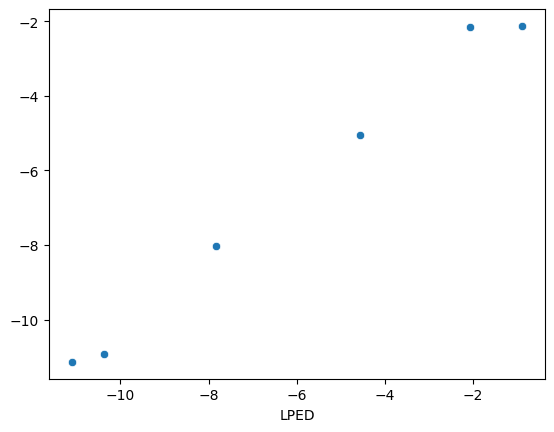

In [28]:
sns.scatterplot(x=Y_test, y=Y_pred)
plt.show()